# Discounts on Poshmark

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)
knitr::opts_chunk$set(fig.width=6, fig.height=6)
if (!require("rvest")) install.packages("rvest")
library("rvest")

Here we will show how to do webscraping with rvest and the chrome
extension selector gadget. This technique is borrowed from the great
explanation at: [Online Bargin Hunting in R with
rvest](https://jef.works/blog/2019/01/12/online-bargain-hunting-in-R-with-rvest/)
and is basically a simplified version of that description

So say we want to pull some data from <http://poshmark.com> and compare
original prices with the current price, maybe to find excellent bargins.
We will look in the category Jackets and Coats-Blazers, and we will just
use the data we find on the first page:

In [ ]:
url <- 'https://poshmark.com/category/Women-Jackets_&_Coats-Blazers?max_id=1'
webpage <- read_html(url)

We just pull the webpage once, then we look for our fields using that
pulled page.

Lets look for the title of the item first;

In [ ]:
nodes<- html_nodes(webpage,'.tc--b')
title <- html_text(nodes)
# This removes some weird non-ascii chars in the title
title <- iconv(title, to="ASCII", sub="")
title<-trimws(title)
str(title)

 chr [1:48] "Kasper || Red Blazer Jacket || 4P" ...

 [1] "Kasper || Red Blazer Jacket || 4P"                                               
 [2] "Rachel Zoe Striped Blazer Single Button Notch Lapels Pockets Button Cuffs Sz M"  
 [3] "nwtlauren rl silk cropped gingham jacket blazer cardigan shrug"                  
 [4] "Parker Powell Patterned Zip Front Celebrity Cited Revolve Cream Blazer Jacket XS"
 [5] "Kenneth Cole dark gray blazer 8"                                                 
 [6] "Mint Condition like new black blazer"                                            
 [7] "SHEIN 2PC BLAZER HALTER TOP SET"                                                 
 [8] "NEW Talbots Plaid Houndstooth Elbow Patch Wool Bla"                              
 [9] "Suit jacket"                                                                     
[10] "Peace of Cloth Black Open Cardigan Blazer"                                       

Next we look for the prices:

In [ ]:
nodes <- html_nodes(webpage,'.fw--bold')
price <- html_text(nodes)
price <- trimws(price)
price<-gsub("$","",price, fixed=TRUE)
#price<-gsub("\u00A0.*","",price)
price<-gsub(",","", price, fixed=TRUE)
price<-as.numeric(price)
str(price)

 num [1:48] 19 48 89 40 30 12 18 24 50 46 ...

 [1] 19 48 89 40 30 12 18 24 50 46

Now lets look for the original price:

In [ ]:
#knitr::knit_exit()
nodes <- html_nodes(webpage,'.td--lt')
original <- html_text(nodes)
original <- trimws(original)
original<-gsub("$","",original, fixed=TRUE)
original<-gsub(",","",original, fixed=TRUE)
original<-as.numeric(original)
str(original)

 num [1:48] 444 0 150 0 78 52 0 0 175 185 ...

 [1] 444   0 150   0  78  52   0   0 175 185

For our discount analysis we exclude the data where the original is 0:

In [ ]:
price <- price[original > 0]
title <- title[original > 0]
original <- original[original > 0]

Lets compute the discount for each item:

In [ ]:
discount <- round(100*(original - price)/original)

Now lets make a dataframe of the info we have:

In [ ]:
df <-data.frame(title, price, original, discount)
df[,c("title","original","discount")]

                                                                            title
1                                               Kasper || Red Blazer Jacket || 4P
2                  nwtlauren rl silk cropped gingham jacket blazer cardigan shrug
3                                                 Kenneth Cole dark gray blazer 8
4                                            Mint Condition like new black blazer
5                                                                     Suit jacket
6                                       Peace of Cloth Black Open Cardigan Blazer
7                                         NWT Philosophy Pinstripe Blazer Stretch
8                                                       Rag & Bone Bromley Blazer
9                                           NWT Leslie Fay Blazer Jacket. Size 10
10                                    BCBGMaxAzria Black Wool Blend Blazer Size M
11                                               Jones  New York Signature Jacket
12              

Now lets see the distribution of discounts people are offering:

 [1] 96 41 62 77 71 75 44 88 78 75 78 75 53 69 65 33 60 85 85 59 63 83 71 41 55
[26] 67 71

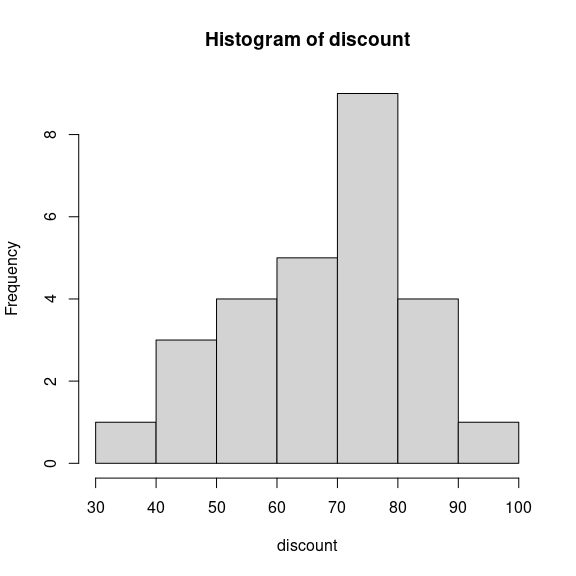

[1] 67.40741

[1] 33 96

In [ ]:
discount

Now lets see the distribution of original prices:

 [1] 444 150  78  52 175 185  99 595  89 198  69 138 170 115 111  75  60  60 990
[20]  74  68  90 225 595  78  55  55

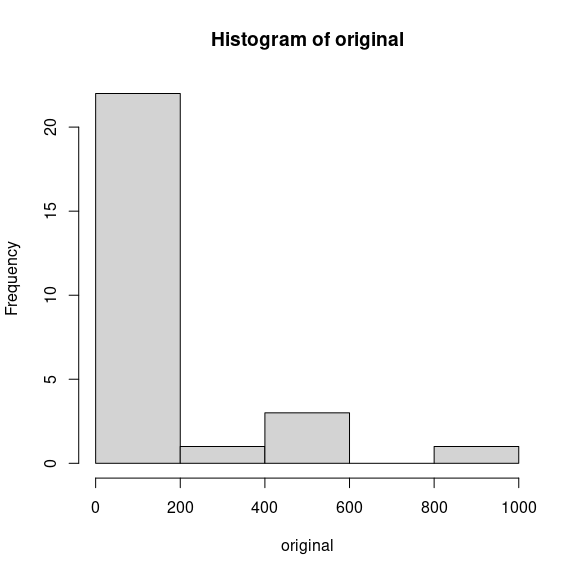

[1] 188.6296

[1]  52 990

In [ ]:
original

Here is a plot of the original vs the offering price:

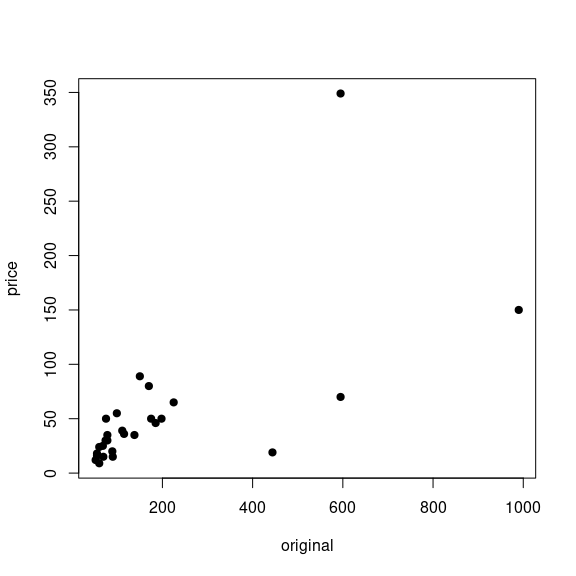

[1] 0.6470025

In [ ]:
plot(original,price, pch=19)